In [1]:
# Stop warnings
# -------------
import warnings
warnings.filterwarnings("ignore")

# General imports
# ---------------
import json
import sys
import os
import glob
import ipdb
import platform
import numpy as np
opj = os.path.join
deb = ipdb.set_trace

# MRI analysis imports
# --------------------
import nibabel as nb
import cifti
from scipy.signal import savgol_filter

In [8]:
# Define analysis parameters
with open('../settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)

In [6]:
len(analysis_info['subject_list'])

181

In [35]:
# Get inputs
subject = '999999' 
#data_file = '/Users/macbook/Desktop/hcp_code/tfMRI_RETALL_Atlas_1.6mm_MSMAll_hp2000_clean_sg.dtseries.nii'
data_file = '/Users/macbook/disks/ae_Shared/2018/visual/subcortical_hcp/pp_data/999999/ts/tfMRI_RETALL_Atlas_1.6mm_MSMAll_hp2000_clean_sg.dtseries.nii'
base_dir = '/Users/macbook/disks/ae_shared/2018/visual/subcortical_hcp'



# Define analysis parameters
with open('settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)

# Define cluster/server specific parameters
if 'lisa' in platform.uname()[1]:
    N_PROCS = 16
elif 'aeneas' in platform.uname()[1]:
    N_PROCS = 8 #It was 31 before
elif 'local' in platform.uname()[1]:
    N_PROCS = 4
    
print(platform.uname()[1])

Macbook-MacBook-Pro.local


In [36]:
# Load data
#data = cifti.read(data_file)
data_load = nb.load(data_file)
data = data_load.get_data()

In [37]:
data.shape

(1800, 170494)

In [38]:
run_duration = 300

for task_num,task in enumerate(analysis_info['task_list']):
    print(task_num, task)
    mean_blank = data[task_num*run_duration:task_num*run_duration+analysis_info["blanks"][task_num]].mean(axis=0)
    data[task_num*run_duration:(task_num+1)*run_duration] -= mean_blank
    data[task_num*run_duration:(task_num+1)*run_duration] /= mean_blank
    data[task_num*run_duration:(task_num+1)*run_duration] *= 100
    


0 tfMRI_RETCCW_7T_AP
1 tfMRI_RETCW_7T_PA
2 tfMRI_RETEXP_7T_AP
3 tfMRI_RETCON_7T_PA
4 tfMRI_RETBAR1_7T_AP
5 tfMRI_RETBAR2_7T_PA


In [39]:
print(data)

[[-0.03940178 -0.01210276 -0.16508037 ...  0.35202092  0.910431
   0.448051  ]
 [-0.06327083 -0.15932994 -0.17850353 ... -0.06974104  0.17835014
   0.04079406]
 [-0.07455707  0.06092888 -0.19945982 ... -0.26860583 -0.07225192
  -0.28315184]
 ...
 [-0.01750147  0.11298048 -0.06479622 ...  0.819748    0.21740045
   0.13185397]
 [ 0.16203474  0.12384246  0.06971459 ... -0.05296811  0.66753435
   0.3599684 ]
 [-0.16375394 -0.08265481 -0.27724856 ...  0.34452054  0.35652393
   0.12406459]]


In [41]:
# Save the 6 tasks data
try: os.makedirs(opj('new_file',))
except: pass
file_out_name = opj('new_file','tfMRI_RETALL_Atlas_1.6mm_MSMAll_hp2000_clean_sg_psc_all.dtseries.nii')

data_out = nb.Cifti2Image(dataobj = data, 
                            header = data_load.header, 
                            nifti_header = data_load.nifti_header, 
                            extra = data_load.extra)
nb.save(data_out, file_out_name)

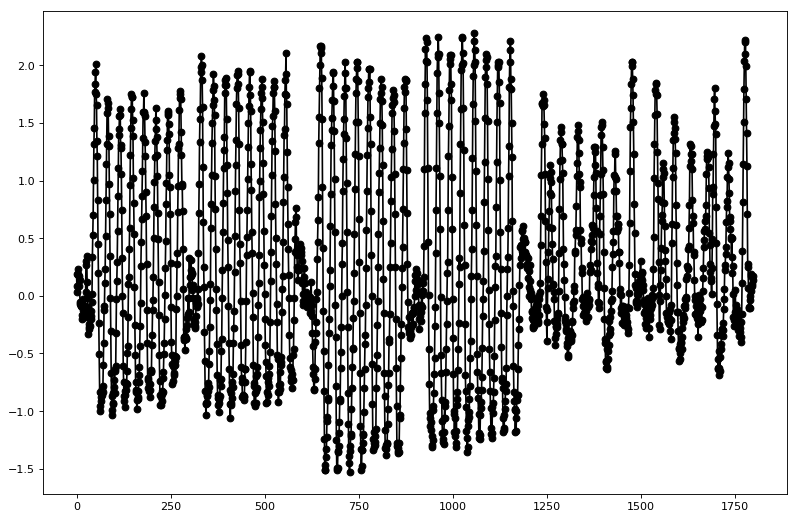

In [51]:
import matplotlib.pyplot as plt

vox = 4
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(data[0:1800,vox],'-ko',label='data')


plt.show()





In [44]:
data

memmap([[-0.03940178, -0.01210276, -0.16508037, ...,  0.35202092,
          0.910431  ,  0.448051  ],
        [-0.06327083, -0.15932994, -0.17850353, ..., -0.06974104,
          0.17835014,  0.04079406],
        [-0.07455707,  0.06092888, -0.19945982, ..., -0.26860583,
         -0.07225192, -0.28315184],
        ...,
        [-0.01750147,  0.11298048, -0.06479622, ...,  0.819748  ,
          0.21740045,  0.13185397],
        [ 0.16203474,  0.12384246,  0.06971459, ..., -0.05296811,
          0.66753435,  0.3599684 ],
        [-0.16375394, -0.08265481, -0.27724856, ...,  0.34452054,
          0.35652393,  0.12406459]], dtype=float32)